<h1>Using machine learning to predict properties of chemicals</h1>

There are numerous properties worth studying about chemicals, such as their boiling and melting points, their densities at room temperature, or even their color. Learning more about a chemical's properties can help us identify potential ways in which we can use them to better the human condition, such as by creating refrigerants that don't harm the ozone layer or new ways to treat diseases. 

In this activity, we will explore how machine learning can use data about the properties of chemicals using various mathematical approaches. Specifically, we'll explore how well three different machine learning models can predict properties related to periodic trends. 

First, we will work together to explore how well these machine learning models can predict ionization energy. 

Second, you will work on your own in teams to select a _different_ periodic trend and use the data provided to evaluate the ability of the provided machine learning models to predict the periodic trend data. 

<h2>Step 1: Preparing our Python libraries and datasets</h2> 

To begin, we need to load our Python notebook with some Python libraries. Libraries are code that someone else has written that we can use to make our programming lives easier. This code is abstracted away and we simply use commands that are provided by the library's author to perform specific functions. Using libraries is standard in many fields in the programming industry.

In [1]:
import numpy as np ##imports the numpy library, which is useful for doing mathematics and analysis with data
import matplotlib.pyplot as plt ##imports the matplotlib library, which is useful for graphing data
import pandas as pd ##imports the pandas library, which is useful for working with datasets

Next we need to load in our data. The dataset we are using today has several types of data for various chemicals. Each chemical has its own row with data organized into different columns. The columns we are interested in today are the fourth column and the fifth column. In python, we start counting at 0, so our code needs to reference columns 3 and 4. 

In [2]:
file_path = './pt-data.csv' ##this is a relative file path

#In the line below, we read in the data from the data file using the file_path variable assigned above
#We instruct the computer to skip the first row and to not create a header (labels for data)
#Skipping the header row in this case is purely down to preference, we could keep it and deal with it later on (but we won't)
data = pd.read_csv(file_path, header=None, skiprows=1)

#In the lines below, we create two smaller sets of the data
#The first set contains all the molecular weights of the substances from column 2 of the original data set
#The second set contains all the boiling points of the substances from column 3 of the original data set
atomic_number = data[0].to_numpy()
ionization_energy = data[8].to_numpy()

Since we are learning as we go, it is probably good to check and make sure what we wanted to do is what we actually did. Let's create a graph of our data points to make sure they have the expected values and trend. 

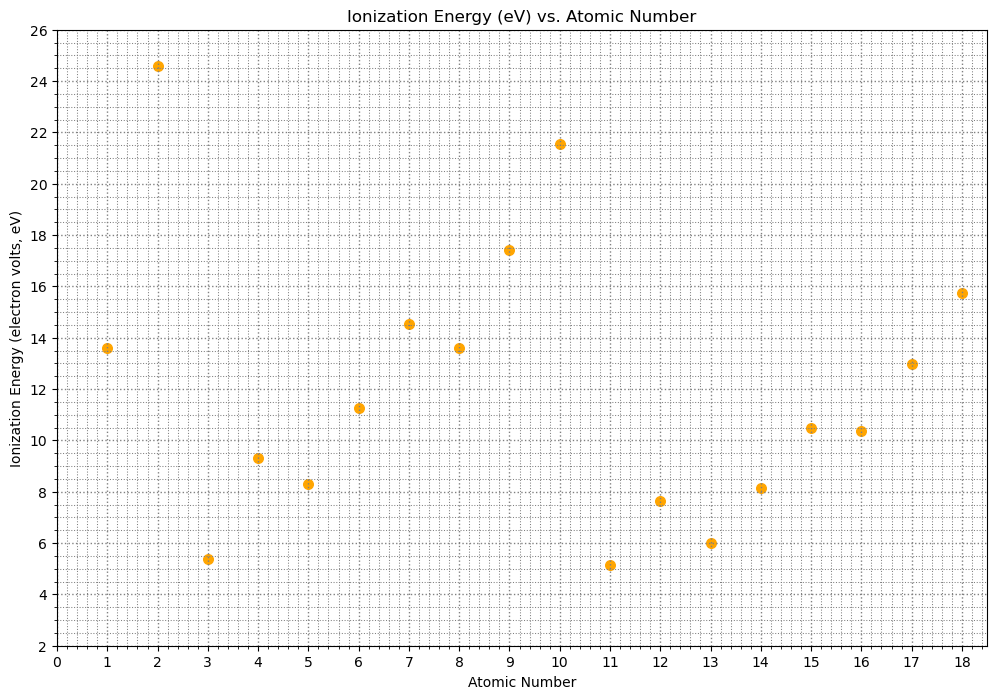

In [22]:
plt.figure(figsize=(12,8)) #this creates a figure using matplotlib that has the size of 12 units across and 8 units tall

#Let's discuss this code in our session -- what is it doing? how do you we know?
plt.scatter(atomic_number, atomic_mass, color='orange', s=48) #
plt.xlabel('Atomic Number') #
plt.ylabel('Ionization Energy (electron volts, eV)') #
plt.title('Ionization Energy (eV) vs. Atomic Number') #

plt.minorticks_on()  # Enable minor ticks
plt.grid(which='major', linestyle=':', linewidth='1', color='grey')  # Major gridlines
plt.grid(which='minor', linestyle=':', linewidth='0.75', color='grey')  # Minor gridlines
plt.xlim(left=0, right=18.5)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.yticks([2,4,6,8,10,12,14,16,18,20,22,24,26])
plt.show() #displays the graph when the code is run

<h2>Step 2: Preparing our data for machine learning</h2>

For the machine learning process, we are going to seperate our data into two groups: 
1. The first group is the _training_ group, and this group will be used to train the data set
2. The second group is the _testing_ group, and this group will be used to test the ability of the machine to predict data it has _not_ seen previously during training

In this step, we also make some changes to how the data is organized so the Python code for machine learning can work, but this is beyond what we need to discuss today. 

In [6]:
# Step 3: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
atomic_number_train, atomic_number_test, atomic_mass_train, atomic_mass_test = train_test_split(
    atomic_number.reshape(-1, 1), atomic_mass, test_size=0.8, random_state=0)

<h2>Step 3: Now let's see how different models perform on the dataset</h2>

Each of the three code blocks below contain a different machine learning model. The model is trained using the training data set, and then tested by predicting the boiling point of the substances in the training data set.

During training, the machine uses a mathematical model to try to predict the boiling point correctly. When it is wrong, it adjusts some of the numbers it uses in the model to try to get closer to the correct boiling point from the data set. 

Once it is sufficiently good at predicting the _known_ boiling points, we can have it predict boiling points for substances it has never seen before. By plotting the machine's prediction for data in the testing data set versus the actual boiling points, we can visually see how well the model performs. 

<h3>Decision Tree Regressor Model</h3>

The Decision Tree Regressor attempts to split the data set into increasingly smaller groups based upon common factors. Imagine we had a data set with colors from blue to yellow. 

Graphic of blue to yellow dots, including green. 

A decision tree regressor model tries a bunch of different mathematical approaches to split the data so that the data with the most features in common are grouped together. As the model progresses in sorting the data, the groupings get smaller and smaller. This model is useful for predicting data that has several influencing factors. 

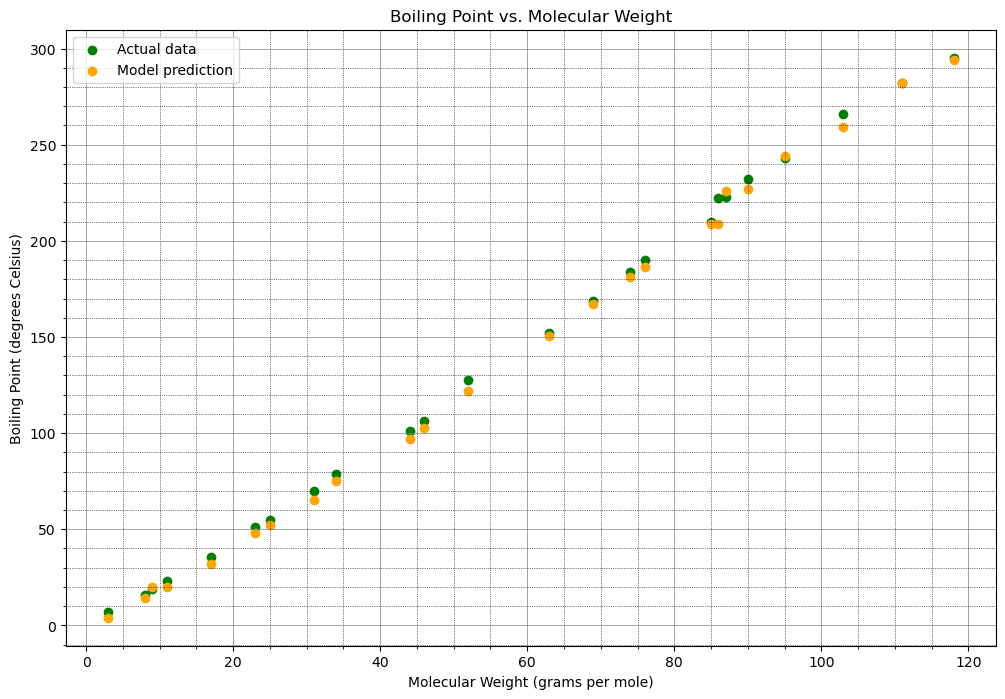

In [8]:
from sklearn.tree import DecisionTreeRegressor

# Step 4: Create and train the machine learning model
model = DecisionTreeRegressor()
model.fit(atomic_number_train, atomic_mass_train)

# Step 5: Evaluate the model
atomic_mass_pred = model.predict(atomic_number_test)

# Step 6: Plot the results
plt.figure(figsize=(12,8))
plt.scatter(atomic_number_test, atomic_mass_test, color='green', label='Actual data')
plt.scatter(atomic_number_test, atomic_mass_pred, color='orange', label='Model prediction')
plt.xlabel('Molecular Weight (grams per mole)')
plt.ylabel('Boiling Point (degrees Celsius)')
plt.title('Boiling Point vs. Molecular Weight')
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')  # Major gridlines
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')  # Minor gridlines
plt.legend()
plt.show()

<h3>Nearest Neighbors model</h3> 

A nearest neighbors model tries to predict a data point by looking at the data values that are nearest to it. Imagine you have 100 data points ranging from (0,0) to (90,100). Consider a situation where you want to predict the value of a new data point, and the three nearest data points to it are (2,2), (4,6), and (5,8). 

A nearest neighbors model could look to these nearest data points and calculate their average to predict the value of the new data point. For instance, if the new data point is at coordinates (3, 4), the model will determine the similarity between this point and the three nearest points and make a prediction based on their values. This approach is particularly useful in tasks where it's acceptable to make the assumption that data points that are close to each other are likely to have similar characteristics.

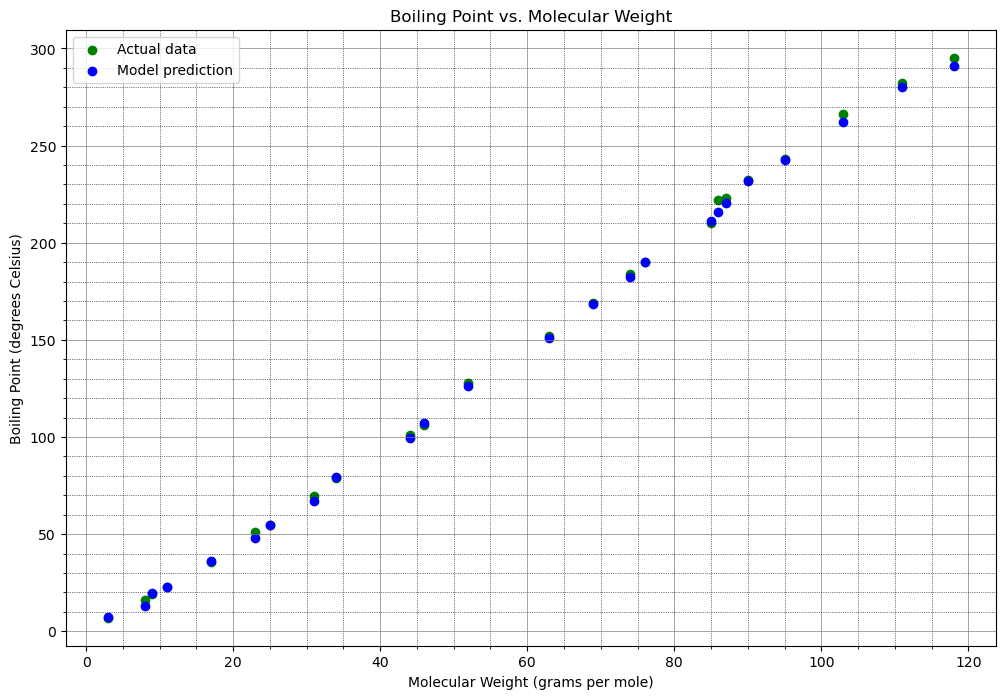

In [11]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(atomic_number_train, atomic_mass_train)

# Step 5: Evaluate the model
atomic_mass_pred = model.predict(atomic_number_test)

# Step 6: Plot the results
plt.figure(figsize=(12,8))
plt.scatter(atomic_number_test, atomic_mass_test, color='green', label='Actual data')
plt.scatter(atomic_number_test, atomic_mass_pred, color='blue', label='Model prediction')
plt.xlabel('Molecular Weight (grams per mole)')
plt.ylabel('Boiling Point (degrees Celsius)')
plt.title('Boiling Point vs. Molecular Weight')
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')  # Major gridlines
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')  # Minor gridlines
plt.legend()
plt.show()

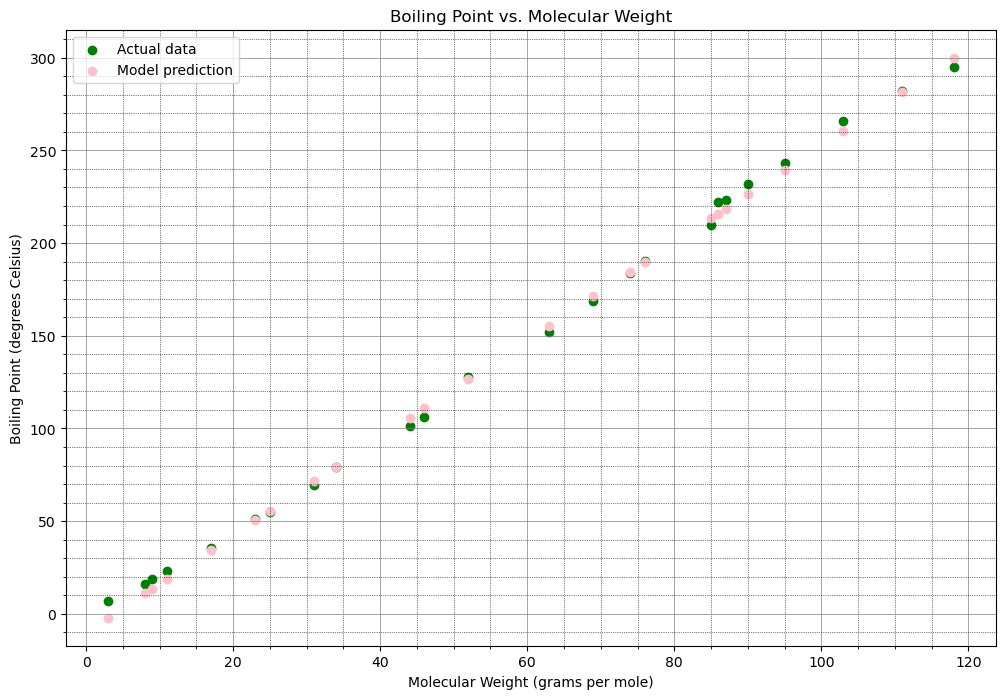

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(atomic_number_train, atomic_mass_train)

# Step 5: Evaluate the model
atomic_mass_pred = model.predict(atomic_number_test)

# Step 6: Plot the results
plt.figure(figsize=(12,8))
plt.scatter(atomic_number_test, atomic_mass_test, color='green', label='Actual data')
plt.scatter(atomic_number_test, atomic_mass_pred, color='pink', label='Model prediction')
plt.xlabel('Molecular Weight (grams per mole)')
plt.ylabel('Boiling Point (degrees Celsius)')
plt.title('Boiling Point vs. Molecular Weight')
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')  # Major gridlines
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')  # Minor gridlines
plt.legend()
plt.show()